<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Introduction_to_Statistical_Learning/ISL03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
## Simple Linear Regression
**Linear Model**. A linear regression assumes that there is approximately a linear relationship between $X$ and $Y$. In other words, we are *regressing* $Y$ *on* $X$ (or $Y$ *onto* $X$) and write:
$$Y \approx \beta_0+\beta_1X, \qquad (1)$$
where $\beta_0$ and $\beta_1$ are two unknown constants that represent the *intercept* and *slope*, together the model *coefficients* or *parameters*. 

**Least Squares Line**. Once we have used our training data to produce estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ for the model coefficients, we can compute:
$$\hat{y} = \hat{\beta}_0+\hat{\beta}_1x, \qquad (2)$$
where $\hat{y}$ indicates a prediction of $Y$ on the basis of $X=x$.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

import warnings
warnings.filterwarnings('ignore')

**An Example: The Advertising Data**

In [3]:
path = 'https://raw.githubusercontent.com/tdpetrou/Machine-Learning-Books-With-Python/master/Introduction%20to%20Statistical%20Learning/data/'
adv = pd.read_csv(path+'Advertising.csv')
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


poly([7.03259355 0.04753664])


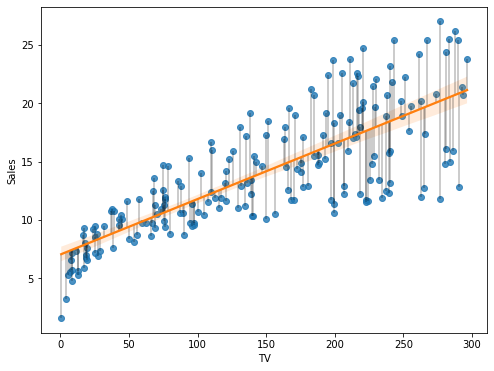

In [4]:
# This forms part of old polynomial API. Since version 1.4, the new polynomial API defined in numpy.polynomial is preferred.
# fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
# y_hat = fit[1] + adv['TV'] * fit[0]

# Use `convert()` to get the coefficients in the unscaled data domain
fit = Polynomial.fit(adv['TV'], adv['Sales'], deg = 1).convert()
print(fit)
y_hat = fit.coef[0] + fit.coef[1] * adv['TV'] 

plt.figure(figsize=(8, 6))
sns.regplot('TV', 'Sales', data=adv, line_kws={'color':'tab:orange'})
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

For the Avertising data, the least squares fit for the regression of *Sales* onto *TV* is shown. The fit is found by minimizing the residual sum of squares. Each grey line segment represents a residual. In this case a linear fit captures the essence of the relationship, although it overestimates the trend in the left of the plot.

**Residual Sum of Squares (RSS)**. Let $\hat{y_i} = \hat{\beta}_0+\hat{\beta}_1x_i$ be the prediction for $X$ based on th $ith$ value of $X$. Then $e_i = y_i - \hat{y}_i$ represents the $ith$ *residual* - this is the difference between the $ith$ observed response value and the $ith$ response value that is predicted by our linear model. We define the *residual sum of squares* (RSS) as
$$RSS=e_1^2+e_2^2+...+e_n^2,$$
or equivalently as
$$RSS=(y_1-\hat{\beta}_0-\hat{\beta}_1x_1)^2+(y_2-\hat{\beta}_0-\hat{\beta}_1x_2)^2+...+(y_n-\hat{\beta}_0-\hat{\beta}_1x_n)^2. \qquad (3)$$

**Least Squares Regression Coefficent Estimates**. The least squares approach chooses $\hat{\beta}_0$ and $\hat{\beta}_1$ to minimize RSS:

$$\hat{\beta}_1=\frac{\sum_{i-1}^n(x_i-\bar{x}_i)(y_i-\bar{y}_i)}{\sum_{i-1}^n(x_i-\bar{x}_i)^2}, \quad \hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}, \qquad (4)$$

where $\bar{y}\equiv\frac{1}{n}\sum_{i-1}^ny_i$ and $\bar{x}\equiv\frac{1}{n}\sum_{i-1}^nx_i$ are the sample means. In other words, $(4)$ defines the *least squares coefficient estimates* for simple linear regression.


### Assesing the Accuaracy of the Coefficient Estimates
**Population Regression Line**. If $f$ is to be approximated by a linear function, then we can write this relationship as
$$Y = \beta_0+\beta_1X+\epsilon. \qquad (5)$$
Here $\beta_0$ is the intercept term - that is, the expected value of $Y$ when $X=0$ and $\beta_1$ is the slope - the average increase in $Y$ associated with a one-unit increase in $X$. The error term is a catch-all for what we miss with this simple model: the true relationship is probably not linear, there may be other variables that cause variation in $Y$, and there may be measurement error. We typically assume that the error term in independent of $X$.

**The Example: Simulated Linear Relationship**.
$$Y=2 + 3X + \epsilon \qquad (6)$$
The popuplation regression line is generally not known for real data (i.e. unobserved), but we have access to a set of observations from which we can compute the least squares line.

**Unbiased Estimate**. On the basis of one particular set of observations $y_i$, $\hat{\mu}$ might overestimate $\mu$, and on the basis of another set of observations, $\hat{\mu}$ might underestimate $\mu$. But if we could average a huge number of extimates of $\mu$ obtained from a huge number of estimates of $\mu$ obtained from a huge number of sets of observations, then this average would *exactly* equal $\mu$. The property of unbiasedness holds for the least squares coefficient estimates given by $(4)$ as well.

**Standard Error of $\hat{\mu}$**. How accurate is the sample mean $\hat{\mu}$ as an estimate of $\mu$? In general, we answer this question by computing the *standard error* of $\hat{\mu}$, written as $\text{SE}(\hat{\mu})$:
$$\text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2=\frac{\sigma^2}{n}, \qquad (7)$$
where $\sigma$ is the standard deviation of each of the realizations $y_i$ of $Y$ (provided that the $n$ observations are uncorrelated). Equation $(7)$ also tells us how this deviation shrinks with $n$ - the more observations we have, the smaller the standard error of $\hat{\mu}$.

**Standard Errors Associated with $\hat{\beta}_0$ and $\hat{\beta}_1$**. in a similar vein, we can wonder how close $\hat{\beta}_0$ and $\hat{\beta}_1$ are to the true values $\beta_0$ and $\beta_1$. To compute standard errors associated with $\hat{\beta}_0$ and $\hat{\beta}_1$, we use the following formulas:
$$\text{SE}(\hat{\beta}_0)^2=\sigma^2\big[\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i-1}^n(x_i-\bar{x})^2}\big], \quad \text{SE}(\hat{\beta}_1)^2=\frac{\sigma^2}{\sum_{i-1}^n(x_i-\bar{x})^2}, \qquad (8)$$
where $\sigma^2 = \text{Var}(\epsilon)$. For this formulas to be stricly valid, we need to assume, that the errors $\epsilon_i$ for each observation have common variance $\sigma^2$ and are uncorrelated. Even if this is not true, the formula still turns out to be a good approximation. In general $\sigma^2$ is not known, but can be estimated from the data. This estimate of $\sigma$ is known and the *residual standard error*, and is given by the formula $\text{RSE}=\sqrt{\text{RSS}/(n-2)}$.

**Confidence Intervals**. Standard errors can be used to compute *confidence intervals*. A $95\%$ confidence interval has the following property: if we take repeated samples and construct the confindence interval for each sample, $95\%$ of the intervals will contain the true unknown value of the parameter. For linear regression, the $95\%$ confidence interval for $\beta_1$ approximately takes the form
$$\hat{\beta}_1 \pm 2 \cdot \text{SE}(\hat{\beta}_1) \qquad (9)$$

That is, there is approximately a $95\%$ chance that the interval
$$\big[\hat{\beta}_1-2\cdot\text{SE}(\hat{\beta}_1), \hat{\beta}_1+2\cdot\text{SE}(\hat{\beta}_1) \big] \qquad (10)$$
will contain the true value of $\beta_1$. Similarly, a confindence interval for $\beta_0$ approximately takes form
$$\hat{\beta}_0 \pm 2 \cdot \text{SE}(\hat{\beta}_0). \qquad (11)$$

**Hypothesis Tests**. Standard errors can also be used to perform *hypothesis tests* on the coefficients. The most common test involves testing the *null hypotesis* of
$$H_0 : \text{There is no relationship between } X \text{ and } Y. \qquad (12)$$
versus the *alternative hypothesis*
$$H_1 : \text{There is some relationship between } X \text{ and } Y. \qquad (13)$$
Mathematically, this corresponds to testing
$$H_0 : \beta_1 = 0$$
versus
$$H_a : \beta_1 \neq 0,$$
since if $\beta_1=0$ then the model $(5)$ reduces to $Y=\beta_0 + \epsilon$, and $X$ is not associated with $Y$.

**$t$-statistics**. To determine whether $\hat{\beta}_1$ is sufficently far from zero, we compute a *$t$-statistic*, given by
$$t=\frac{\hat{\beta}_1-0}{\text{SE}(\hat{\beta}_1)}, \qquad (14)$$
which measures the number of standard deviations that $\hat{\beta}_1$ is away from $0$. 

**$p$-value**. If there is no relationship between $X$ and $Y$, then we can expect $(14)$ will have a $t$-distribution with $n-2$ degrees of freedom. Consequently, it is a simple matter to compute the probability of observing any number equal to $|t|$ of larger in absolute value, assuming $\beta_1=0$. We call this probability the $p$-value. Roughly speaking, we interpret the $p$-value as follows: a small $p$-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response. Hence, if we see a small $p$-value, then we can infer that there is an association between the predictor and the response. We *reject the null hypothesis*. Typical $p$-values for rejecting the null hypothesis are $5\%$ or $1\%$.

In [5]:
import statsmodels.api as sm
# Using numpy arrays instead of formula.api
adv = sm.add_constant(adv)
print(sm.OLS(adv['Sales'], adv[['const', 'TV']]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        06:02:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

### Assessing the Accuracy of the Model
Once we have rejected the null hypothesis $(12)$ in favor or the alternative hypothesis $(13)$, it is natural to want to quantify *the extent to which the model fits the data*.

**Residual Standard Error ($\text{RSE}$)**. The $\text{RSE}$ is an estimate of the standard deviation $\epsilon$. Roughly speaking, it is an average amount that the response will deviate from the true regression line. It is computed using formula
$$\text{RSE}=\sqrt{\frac{1}{n-2}\text{RSS}} =\sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i-\hat{y}_i)^2}. \qquad(15)$$
Note that RSS was defined above in $(3)$ and is given by the formula
$$\text{RSS}=\sum_{i=1}^n(y_i-\hat{y}_i)^2. \qquad(16)$$

**$R^2$ Statistic**. The $\text{RSE}$ provides an absolute measure of lack of fit of the model $(5)$. But since it is measured in the units of $Y$, it is not always clear what constitutes a good $\text{RSE}$. The $R^2$ statistic provides an alternative measure of fit. It takes a form of a *proportion* - the proportion of variance explained - and so it always takes on a value between $0$ amd $1$, and is independent of the scale of $Y$. To calculate $R^2$, we use the formula
$$R^2=\frac{\text{TSS}-\text{RSS}}{\text{TSS}} =1 - \frac{\text{RSS}}{\text{TSS}}, \qquad (17)$$
where $\text{TSS} = \sum(y_i-\bar{y})^2$ is the *total sum of squares*, and $\text{RSS}$ is defined in $(16)$. An $R^2$ measures the *proportion of variability in $Y$ that can be explained using $X$*.

**Correlation (for Simple Regression)**. The $R^2$ statistic is a measure of the linear relationship between $X$ and $Y$. Recall that *correlation*, defined as
$$\text{Cor}(X,Y)=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i-1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i-1}^n(y_i-\bar{y})^2}}, \qquad(18)$$
is also a measure of the linear relationship between $X$ and $Y$. In the simple linear regression setting, $R^2 = \text{Cor}(X,Y)^2 = r^2$. But the concept of correlation does not extend automatically to the multiple linear regression setting.


## Multiple Linear Regression
Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model $(5)$ so that it can directly accomodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model. In general, suppose that we have $p$ distinct predictors. Then the multiple linear regression model takes the form
$$Y=\beta_0 +\beta_1X_1 +\beta_2X_2 +...+ \beta_pX_p + \epsilon, \qquad (19)$$
where $X_j$ represents the $jth$ predictor and $\beta_j$ quantifies the association between that variable and the response. We interpret $\beta_j$ as the average effect on $Y$ of a one unit increase in $X_j$, *holding all other predictor fixed*.


**Example**
$$\text{Sales}= \beta_0 + \beta_{TV}\times\text{TV} + \beta_{Radio}\times\text{Radio} + \beta_{Newpaper}\times\text{Newspaper} + \epsilon\qquad(20)$$

### Estimating the Regression Coefficients
As was the case in the simple linear regression setting, the regression coefficients $\beta_0,\beta_1,...,\beta_p$ in $(19)$ are unknown, and must be estimated. Given estimates $\hat{\beta_0},\hat{\beta_1},...,\hat{\beta_p}$, we can make predictions using the formula
$$\hat{y}=\hat{\beta_0} + \hat{\beta_1}x_1+\hat{\beta_2}x_2+...+\hat{\beta_p}X_p.\qquad (21)$$

The parameters are estimated using the same least squares approach that we saw in the context of simple linear regression. We choose $\hat{\beta_0},\hat{\beta_1},...,\hat{\beta_p}$ to minimize the sum of squared residals
$$\text{RSS}= \sum_{i=1}^n(y_i-\bar{y}_i)^2 = \sum_{i=1}^n(y_i-\hat{\beta}_0 -\hat{\beta}_1x_{i1} -\hat{\beta}_2x_{i2} - ... -\hat{\beta}_px_{ip} )^2\qquad (22)$$

### Some Important Questions
#### One: Is There a Relationship Between the Response and Predictors?
**F-statistics**. To determine whether there is a relationship between the response and the predictors we test the null hypothesis, 
$$H_0:\beta_{TV}=\beta_{Radio}=\beta_{Newspaper}=0$$
versus the alternative
$$H_a:\text{at least one }\beta_{j\in\{TV, Radio, Newspaper\}} \text{ is non-zero}.$$

This hypothesis test is performed by computing the $F$-statistic,
$$F = \frac{(\text{TSS}-\text{RSS})/p}{\text{RSS}/(n-p-1)},\qquad (23)$$
where $\text{TSS}=\sum(y_i-\bar{y})^2$ and $\text{RSS}=\sum(y_i-\hat{y}_i)^2$. If the linear model assumptions are correct, on can show that
$$E\{\text{RSS}/(n-p-1)\} = \sigma^2$$
and that
$$E\{(\text{TSS}-\text{RSS})/p\} = \sigma^2.$$
Hence, when there is no relationship between the response and predictors, one would expect the $F$-statistics to take on a value close to 1. On the other hand, if $H_a$ is true, then $E\{(TSS-RSS)/p\} > \sigma^2$, so we expect $F$ to be greater than $1$.

When $H_0$ is true and the errors $\epsilon_i$ have a normal distribution, the $F$-statistic follows an $F$-distribution. For any given value of $n$ and $p$, any statistical software package can be used to compute the $p$-value associated with the $F$-statistic using this distribution. Based on this $p$-value, we can determine whether or not to reject $H_0$.

**Testing a subset of coefficients**. Sometimes we want to test that a particular subset of $q$ of the coefficients are zero. This corresponds to a null hypothesis
$$H_0: \beta_{p-q+1}=\beta_{p-q+2}=...=\beta_p=0,$$
where for convenience we have put the variables chosen for omission at the end of the list. In this case we fit a second model that uses the variables *except* those last $q$. Suppose that the residual sum of squares for that model is $\text{RSS}_0$. then the appropirate F-statistic is

$$F=\frac{(\text{RSS}_0-\text{RSS})/q}{\text{RSS}/(n-p-1)}.\qquad (24)$$

Now we can look at $t$-statistic and corresponding $p$-values of individual predictors. These provide information about whether each individual predictor is related to the response, after adjusting for the other predictors. Each $t$-statistic is the square root of the corresponding $F$-statistic of $F$-test that omits that single variable from the model, leaving all the others in (i.e. $q=1$ in $(24)$). So it reports the *partial effect* of adding that variable to the model.

We need to look at the overall $F$-statistic, especially when the number of predictors $p$ is large!

#### Two: Deciding on Important Variables

#### Three: Model Fit
$$\text{RSE}= \qquad (25)$$

#### Four: Prediction

## Other Consideration in the Regression Model
### Qualitative Predictors
**Predictors with Only Two Levels**.
$$x_i
  \begin{cases}
  1 & \text{if }ith\text{ person owns a house} \\
  0 & \text{if }ith\text{ person does not owns a house}
  \end{cases}, \qquad (26)$$

$$y_i= \qquad (27)$$

**Qualitative Predictors with More than Two Levels**.
$$x_{i1}=...\qquad (28)$$
$$x_{i2}=...\qquad (29)$$
$$y_i= \qquad (30)$$

### Extensions of the Linear Model
#### Removing the Additive Assumption
$$Y=...\qquad (31)$$
$$Y=...\qquad (32)$$

**Example**
$$\text{sales}=...\qquad (33)$$

**Example**
$$\text{balance}_i\approx...\qquad (34)$$

**Example**
$$\text{balance}_i\approx...\qquad (35)$$

#### Non-linear Relationships
**Example**
$$\text{mpg}=...\qquad (36)$$


### Potential Problems
1. Non-linearity of the Data
2. Correlation of Error Terms
3. Non-constant Variance of Error Terms
4. Outliers
5. High Leverage Points
$$h_i=...\qquad (37)$$
6. Collinearity

## Comparison of Linear Regression with $K$-Nearest Neighbors